## Credit default model
The purpose of this project is to create a model that is able to predict whether a loan will be defaulted based on a set of attributes of the individuals.

### Summary of results

### 0. Importing libraries and data, and general setup

#### Importing libraries and setting up the environment

In [1]:
# Importing libraries Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import ks_2samp
# Keep graphs in line
%matplotlib inline
# Show all columns in pandas
pd.set_option('max_columns', None)
# Graphing style
plt.style.use('seaborn-colorblind')

#### Importing data from csv files

In [2]:
# Importing training data provided
df_train = pd.read_csv('data/train.csv')
# Converting all column names into lowercase and removing any spaces
df_train.columns = [x.strip().lower() for x in df_train.columns]
# Importing testing data
df_test = pd.read_csv('data/test.csv')
# Converting all column names into lowercase and removing any spaces
df_test.columns = [x.strip().lower() for x in df_test.columns]

### 1. Exploratory data analysis

#### Understanding data shapes
We are provided with the following two sets of data containing information about past costumers including their payment behavior. 
- A training dataset that will be used to train and calibrate the parameters of our model, containing 16,671 observations with 11 attributes and 1 target variable to predict.
- A testing dataset that will be used to test the model that we create with brand new observations and see the performance, including 4,168 observations with the same 11 attributes but no target.

In [31]:
# Printing shapes of the datasets
# Training datset shape
print('Training dataset')
print('- Observations:', str(df_train.shape[0]))
print('- Attributes:', str(df_train.shape[1] - 2))          # ID and Target is not an actual attribute
print('- Target:', str(1))
# Testing dataset
print('Testing dataset')
print('- Observations:', str(df_test.shape[0]))
print('- Attributes:', str(df_test.shape[1] - 1))           # ID is not an actual attribute
# Verifying variables
#print('\n')
if list(df_train.columns[0:-1]) == list(df_test.columns): 
    print('Variables consistency: No issues')


Training dataset
- Observations: 16671
- Attributes: 11
- Target: 1
Testing dataset
- Observations: 4168
- Attributes: 11
Variables consistency: No issues


#### Understanding the data

In [68]:
# Generate a general summary of the variables
df_missingval = pd.DataFrame(df_train.isna().any(), columns=['Missing vals'])               # Check if there are any missing values
df_types = pd.DataFrame(df_train.dtypes, columns=['Variable type'])                         # Obtain the datatypes of all colums
df_describe = df_train.describe().round(decimals=2).transpose()                             # Generate summary statistics
_ = pd.merge(df_missingval, df_types, how='inner', left_index=True, right_index=True)       # Intermediate merge types and missing val
df_var_summary = pd.merge(df_describe, _ , how='outer', left_index=True, right_index=True)  # Final merge 
df_var_summary.loc['date_of_birth', 'count'] = 16671.0                                      # Replace count of date_of_birth
df_var_summary

,count,mean,std,min,25%,50%,75%,max,Missing vals,Variable type
credit_utilization,16671.0,0.05,0.05,0.00,0.01,0.03,0.07,0.54,False,float64
date_of_birth,16671.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,object
debt_to_income_ratio,16671.0,0.33,0.12,0.03,0.25,0.33,0.41,0.80,False,float64
id,16671.0,10917.57,6309.00,1.00,5474.50,10967.00,16349.00,21839.00,False,int64
monthly_income,16671.0,2289.90,319.47,2000.00,2100.00,2200.00,2400.00,5000.00,False,int64
number_90_days_past_due,16671.0,0.10,0.32,0.00,0.00,0.00,0.00,3.00,False,int64
number_charged_off,16671.0,0.10,0.32,0.00,0.00,0.00,0.00,3.00,False,int64
number_dependants,16671.0,0.49,0.72,-1.00,0.00,0.00,1.00,6.00,False,int64
number_open_credit_lines,16671.0,5.00,2.25,0.00,3.00,5.00,6.00,15.00,False,int64
number_open_loans,16671.0,2.03,1.43,0.00,1.00,2.00,3.00,9.00,False,int64


,count,mean,std,min,25%,50%,75%,max
id,16671.0,10917.57,6309.00,1.00,5474.50,10967.00,16349.00,21839.00
number_dependants,16671.0,0.49,0.72,-1.00,0.00,0.00,1.00,6.00
credit_utilization,16671.0,0.05,0.05,0.00,0.01,0.03,0.07,0.54
debt_to_income_ratio,16671.0,0.33,0.12,0.03,0.25,0.33,0.41,0.80
monthly_income,16671.0,2289.90,319.47,2000.00,2100.00,2200.00,2400.00,5000.00
number_open_credit_lines,16671.0,5.00,2.25,0.00,3.00,5.00,6.00,15.00
number_open_loans,16671.0,2.03,1.43,0.00,1.00,2.00,3.00,9.00
number_90_days_past_due,16671.0,0.10,0.32,0.00,0.00,0.00,0.00,3.00
number_charged_off,16671.0,0.10,0.32,0.00,0.00,0.00,0.00,3.00
score1,16671.0,669.90,98.01,500.00,585.00,669.00,756.00,839.00


#### Validating popultions consistency
Before doing any further analysis, it is important to verify that the distributions of both the training and the testing samples were drawn from populations with the same distributions. If this wasn't the case, it would be like trying to predict the behavior of people in the US studying data of people from UK, and therefore, our analysis would lack validity and consistency. 

To perform this evaluation, the Kolmogorov-Smirnov for two samples test (KS2) was used. This test evaluates the hypothesis that both samples were drawn from the same distribution. The graph below shows the Kernel Density Estimations (KDE) for every variable of each samples. Only by scanning the graphs, it is very clear that both samples show similar distributions for all the variables involved. We can also verify that by taking a look at the KS2 p-values. Using a 95% confidence level, as long as the p-value is greater than 0.05, we cannot reject the hypothesis that both samples were drawn from the same distribution. In this case, all the p-values obtained are greater than 0.05, hence, we can confidently move forward knowing that any result obtained will be applicabble to our testing set. 

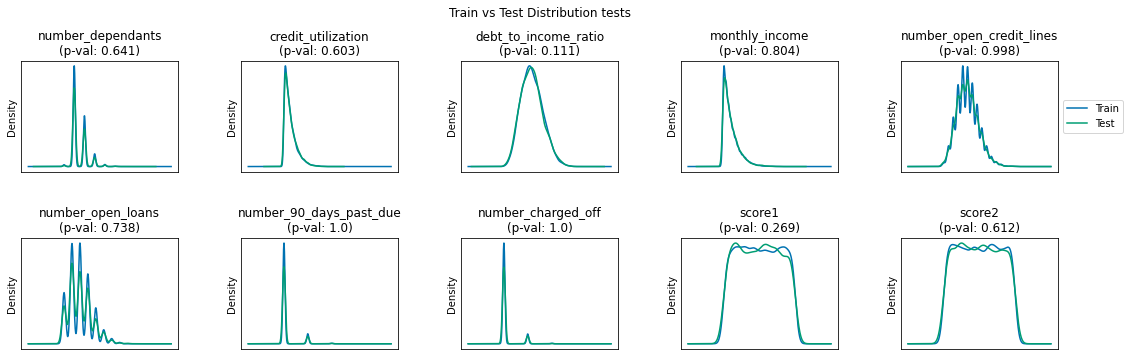

In [4]:
# Plot of the distribution of variables between training and testing
fig, ax = plt.subplots(2,5)                     # Create a 5x2 grid of subplots
fig.set_size_inches((18,5))
fig.suptitle('Train vs Test Distribution tests', y=1.05)
plt.subplots_adjust(left=0.1,                   # Adjust the space between the subplots
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
# Iterate over the plots and the quantitative variables
# to create Kernel Density Estimations (KDE) plots
col_index = 2
for row in range(2):                                                        # Rows loop
    for col in range(5):                                                    # Columns loop
        current_col = df_train.columns[col_index]                           # Curent column
        p_val = ks_2samp(df_train[current_col], df_test[current_col])[1]    # Kolmogorov-Smirnov test for goodness of fit (p-val)
        ax[row][col].set_title(current_col + '\n' + 
                             '(p-val: {})'.format(round(p_val, 3)))
        ax[row][col].tick_params(top=False, bottom=False,                   # Remove ticks
        left=False, right=False, labelleft=False, labelbottom=False)
        df_train[current_col].plot.kde(ax=ax[row][col])
        df_test[current_col].plot.kde(ax=ax[row][col])
        col_index += 1
    
ax[0][4].legend(['Train', 'Test'], loc='center left', bbox_to_anchor=(1, 0.5))

# Save image
plt.savefig('figures/train_vs_test_dist.png')


In [36]:
df_train.boxplot

16671

#### Exploring correlations between variables

<AxesSubplot:>

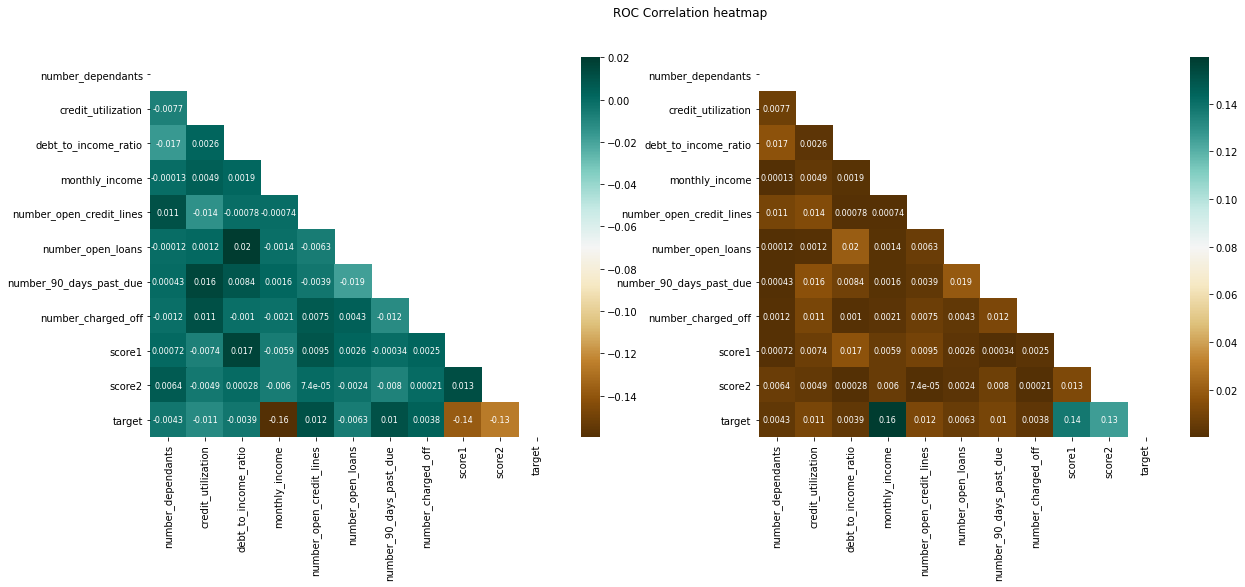

In [30]:
# Creating correlation matrix graph
fig, ax = plt.subplots(1,2)   
fig.set_size_inches((20,7))                                                  # Create a 5x2 grid of subplots
plt.suptitle('ROC Correlation heatmap')
# Mask that allows us to get only the diagonal values 
mask = np.triu(np.ones_like(df_train.drop(columns='id').corr(), dtype=np.bool))
# Graphing correlation matrix with original sign
sns.heatmap(df_train.drop(columns='id').corr(), annot=True, mask=mask, cmap='BrBG', 
            ax=ax[0], annot_kws={"size": 8})
# Graphing correlation matrix with absolute value
sns.heatmap(df_train.drop(columns='id').corr().abs(), annot=True, mask=mask, 
            cmap='BrBG', ax=ax[1], annot_kws={"size": 8})



In [6]:
df_train

,id,date_of_birth,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target
0,1,1993-03-14,1,0.036495,0.208897,2400,6,2,0,0,570,817,0
1,2,1966-09-27,1,0.023423,0.260438,2200,6,1,0,0,741,756,0
2,3,1931-01-11,2,0.027205,0.335922,3000,6,1,0,1,805,779,0
3,5,1943-11-17,0,0.068424,0.314966,2500,2,3,0,0,833,629,0
4,6,1994-02-03,0,0.001003,0.251700,2500,6,6,0,1,830,587,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16666,21833,1975-09-01,0,0.108978,0.457906,2100,6,1,0,0,760,793,0
16667,21834,1941-02-01,1,0.014642,0.540975,2000,12,1,0,0,717,512,0
16668,21835,1960-04-09,0,0.003702,0.182518,2900,3,1,0,0,602,644,0
16669,21837,1999-01-28,2,0.014581,0.202639,2400,6,1,0,0,599,544,0
